In [2]:
# %matplotlib qt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import mne 

from utils import all_markers

Using MNE with API > 0.19


# Load Data

In [7]:
epoch_type = 'evoked'
# epoch_type = 'pseudo-rs'


all_participants = ['VP07','VP08','VP09', 'VP10','VP11','VP12','VP13','VP14','VP18','VP19','VP20','VP22','VP23','VP24','VP25','VP26','VP27','VP28','VP29','VP30','VP31','VP32','VP33','VP35','VP36','VP37']


path = '/media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/' #icm-linux
# path = '/Users/nicobruno/ownCloud/MW_eeg_data/minmarker/' #nico-mac

# Compute Topographies

In [8]:
target = 'topography'

df_mw = pd.DataFrame()
df_ot = pd.DataFrame()

df_smw = pd.DataFrame()
df_dmw = pd.DataFrame()

for i in all_participants:
    participant = i
    
    print('')
    print('#########################################')
    print('Computing markers for participant {}'.format(participant))
    print('#########################################')
    print('')
    

    folder = path + participant +'/'

    
    df_markers = pd.DataFrame()
    df_markers['participant'] = participant
    
    #############################
    #### With ERP SUBTRACTED ####
    #############################
    epochs_subtracted = mne.read_epochs(folder +  participant + '_' + epoch_type + '_' +  'ar_subtracted_epo.fif') 
    epochs_subtracted.info['description'] = 'biosemi/64' #necessary for wSMI 
    epochs_subtracted =  epochs_subtracted.pick_types(eeg = True) #EOGs break everything\
    

    #############################
    ####       With ERP      ####
    #############################
    epochs_erp = mne.read_epochs(folder +  participant + '_' + epoch_type + '_' +  'ar_rereferenced_epo.fif') 
    epochs_erp.info['description'] = 'biosemi/64' #necessary for wSMI 
    epochs_erp =  epochs_erp.pick_types(eeg = True) #EOGs break everything\
    
    try: 
        df = pd.DataFrame.from_dict(all_markers(epochs_subtracted['PC/on-task/correct/go'], 0, 0.6, target, epochs_erp =epochs_erp['PC/on-task/correct/go']))
        df['electrode'] = np.arange(0,64)
        df['participant'] = i

        df_ot = df_ot.append(df)
    except:
        pass
    
    try: 
        df = pd.DataFrame.from_dict(all_markers(epochs_subtracted['PC/dMW/correct/go'], 0, 0.6, target, epochs_erp =epochs_erp['PC/dMW/correct/go']))
        df['electrode'] = np.arange(0,64)
        df['participant'] = i

        df_mw = df_mw.append(df)
    except:
        pass
    try: 
        df = pd.DataFrame.from_dict(all_markers(epochs_subtracted['PC/sMW/correct/go'], 0, 0.6, target, epochs_erp =epochs_erp['PC/sMW/correct/go']))
        df['electrode'] = np.arange(0,64)
        df['participant'] = i

        df_mw =  df_mw.append(df)
    except:
        pass
    try: 
        df = pd.DataFrame.from_dict(all_markers(epochs_subtracted['SC/dMW/correct/go'], 0, 0.6, target, epochs_erp =epochs_erp['SC/dMW/correct/go']))
        df['electrode'] = np.arange(0,64)
        df['participant'] = i

        df_dmw = df_dmw.append(df)
    except:
        pass
    try: 
        df = pd.DataFrame.from_dict(all_markers(epochs_subtracted['SC/sMW/correct/go'], 0, 0.6, target, epochs_erp =epochs_erp['SC/sMW/correct/go']))
        df['electrode'] = np.arange(0,64)
        df['participant'] = i

        df_smw =  df_smw.append(df)
    except:
        pass
    


#########################################
Computing markers for participant VP07
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP07/VP07_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
174 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP07/VP07_evoked_ar_rereferenced_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
174 matching events found
No baseline correction applied
0 projection items activated
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    7.6s remaining:   22.8s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    8.0s remaining:    9.4s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    8.5s remaining:    4.2s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    8.8s remaining:    1.3s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    8.8s finished


Elapsed time 0.03840351104736328 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']


[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    3.8s finished


Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD


[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.2s finished


Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']


[Parallel(n_jobs=2)]: Done  16 out of  16 | elapsed:    0.2s finished


Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    7.3s remaining:   21.9s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    7.5s remaining:    8.9s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    7.7s remaining:    3.9s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    8.0s remaining:    1.1s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    8.2s finished


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.06163644790649414 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  16 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done  24 out of  24 | elapsed:    4.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Done  24 out of  24 | elapsed:    0.4s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Done  24 out of  24 | elapsed:    0.4s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Done  24 out of  24 | elapsed:    0.3s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    7.4s remaining:   22.2s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    7.7s remaining:    9.1s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    7.9s remaining:    3.9s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    8.3s remaining:    1.2s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.009235143661499023 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    8.5s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD


[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    3.5s finished


Using 2 jobs
Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    0.1s finished


Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    0.1s finished


Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    0.1s finished


Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    7.4s remaining:   22.2s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    7.6s remaining:    9.0s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    7.9s remaining:    3.9s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    8.1s remaining:    1.2s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.013275146484375 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Pe

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    8.4s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD


[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    3.6s finished


Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.1s finished


Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP08
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP08/VP08_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
433 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minm

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    7.3s remaining:   22.0s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    7.7s remaining:    9.1s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    8.0s remaining:    4.0s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    8.2s remaining:    1.2s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity


[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    8.5s finished


Elapsed time 0.1117091178894043 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation


/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: divide by zero encountered in log
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))
/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: invalid value encountered in multiply
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  16 tasks      | elapsed:    3.8s


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  41 out of  41 | elapsed:    4.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done  41 out of  41 | elapsed:    0.4s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Done  31 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  41 out of  41 | elapsed:    0.4s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Done  41 out of  41 | elapsed:    0.4s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    7.4s remaining:   22.2s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    7.7s remaining:    9.1s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    7.9s remaining:    3.9s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    8.2s remaining:    1.2s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.03838324546813965 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    8.6s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD


[Parallel(n_jobs=2)]: Done  16 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done  17 out of  17 | elapsed:    3.9s finished


Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  17 out of  17 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  17 out of  17 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  17 out of  17 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    7.7s remaining:   23.1s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    8.1s remaining:    9.6s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    8.4s remaining:    4.2s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    8.5s remaining:    1.2s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']


[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    8.6s finished


Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.1604597568511963 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  16 tasks      | elapsed:    4.0s


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  66 out of  66 | elapsed:    4.4s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Done  66 out of  66 | elapsed:    0.8s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Done  66 out of  66 | elapsed:    0.5s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Done  66 out of  66 | elapsed:    0.6s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP09
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP09/VP09_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
334 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minm

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    7.3s remaining:   22.0s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    7.6s remaining:    9.0s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    7.8s remaining:    3.9s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    8.0s remaining:    1.1s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity


[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    8.2s finished


Elapsed time 0.09713482856750488 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation


/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: divide by zero encountered in log
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))
/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: invalid value encountered in multiply
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  16 tasks      | elapsed:    3.7s


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  44 out of  44 | elapsed:    4.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done  44 out of  44 | elapsed:    0.5s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done  44 out of  44 | elapsed:    0.5s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done  44 out of  44 | elapsed:    0.5s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    7.4s remaining:   22.1s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    7.5s remaining:    8.9s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    7.6s remaining:    3.8s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    7.8s remaining:    1.1s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.021505355834960938 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    8.1s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD


[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    3.5s finished


Using 2 jobs
Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.1s finished


Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.1s finished


Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    7.4s remaining:   22.1s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    8.0s remaining:    9.5s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    8.4s remaining:    4.2s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    8.8s remaining:    1.3s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity


[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    9.0s finished


Elapsed time 0.16271376609802246 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 tasks      | elapsed:    1.9s


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  70 out of  70 | elapsed:    2.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  70 out of  70 | elapsed:    0.3s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  70 out of  70 | elapsed:    0.3s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  70 out of  70 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    5.9s remaining:   17.6s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    6.6s remaining:    7.8s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    6.9s remaining:    3.5s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    7.0s remaining:    1.0s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity


[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    7.2s finished


Elapsed time 0.13251113891601562 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  96 out of  96 | elapsed:    1.8s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  96 out of  96 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  96 out of  96 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s


Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP10
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP10/VP10_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
130 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee7853

[Parallel(n_jobs=2)]: Done  96 out of  96 | elapsed:    0.2s finished
[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.4s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.2s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.05672264099121094 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  39 out of  39 | elapsed:    1.8s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  39 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  39 out of  39 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  39 out of  39 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  39 out of  39 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.3s remaining:   10.0s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.4s remaining:    4.0s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.5s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.027551889419555664 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.6s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done  19 out of  19 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  19 out of  19 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  19 out of  19 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=2)]: Done  19 out of  19 | elapsed:    0.1s finished
[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.4s remaining:   10.1s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.1s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.5s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.03289532661437988 sec


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.6s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished


Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done  23 out of  23 | elapsed:    1.6s finished


Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  23 out of  23 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  23 out of  23 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  23 out of  23 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP11
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP11/VP11_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
203 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minm

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.026298046112060547 sec


[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.3s remaining:   10.0s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.4s remaining:    4.0s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.4s remaining:    1.7s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.5s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.5s finished


Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  16 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  17 out of  17 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  17 out of  17 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  17 out of  17 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=2)]: Done  17 out of  17 | elapsed:    0.1s finished
[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.4s remaining:   10.2s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.1s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.5s remaining:    1.8s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.6s remaining:    0.5s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.04073166847229004 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2


[Parallel(n_jobs=2)]: Done  16 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done  29 out of  29 | elapsed:    1.7s finished


Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  29 out of  29 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  29 out of  29 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  29 out of  29 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.3s remaining:   10.0s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.4s remaining:    4.0s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.5s remaining:    1.7s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.5s remaining:    0.5s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.04206442832946777 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.6s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  16 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done  29 out of  29 | elapsed:    1.7s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  29 out of  29 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  29 out of  29 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  29 out of  29 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP12
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP12/VP12_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
54 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minma

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.4s remaining:   10.2s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.1s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.027408838272094727 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation


/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: divide by zero encountered in log
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))
/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: invalid value encountered in multiply
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.3s remaining:    9.8s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.4s remaining:    4.0s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.4s remaining:    1.7s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.008636236190795898 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.5s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.6s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD


[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.0s finished


Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.3s remaining:    9.9s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.4s remaining:    4.0s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.4s remaining:    1.7s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.013153076171875 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Pe

[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.5s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.6s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP13
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP13/VP13_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
493 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minm

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.3s remaining:    9.9s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.4s remaining:    4.0s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.4s remaining:    1.7s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.01888895034790039 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.5s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.6s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Done  11 out of  11 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  11 out of  11 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  11 out of  11 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=2)]: Done  11 out of  11 | elapsed:    0.1s finished
[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.4s remaining:   10.2s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.1s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.00780797004699707 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: divide by zero encountered in log
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))
/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: invalid value encountered in multiply
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.4s remaining:   10.3s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.1s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.016352415084838867 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  11 out of  11 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Done  11 out of  11 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  11 out of  11 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  11 out of  11 | elapsed:    0.1s finished


Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.4s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.2s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.07168865203857422 sec


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished


Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    1.7s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.9s remaining:   11.8s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    4.0s remaining:    4.8s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.1s remaining:    2.1s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    4.2s remaining:    0.6s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.3s finished


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.34297800064086914 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done 238 out of 238 | elapsed:    1.9s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 110 tasks      | elapsed:    0.2s


Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Done 238 out of 238 | elapsed:    0.3s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 146 tasks      | elapsed:    0.2s


Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Done 238 out of 238 | elapsed:    0.3s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 146 tasks      | elapsed:    0.2s


Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Done 238 out of 238 | elapsed:    0.3s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP14
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP14/VP14_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
486 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minm

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.6s remaining:   10.8s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.7s remaining:    4.3s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.008494377136230469 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.8s remaining:    1.9s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.9s remaining:    0.6s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.0s finished


Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.4s remaining:   10.3s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.6s remaining:    4.2s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.012106895446777344 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.9s remaining:   11.6s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    4.0s remaining:    4.7s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.1s remaining:    2.0s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    4.2s remaining:    0.6s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.2s finished


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.27745795249938965 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: divide by zero encountered in log
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))
/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: invalid value encountered in multiply
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done 193 out of 193 | elapsed:    1.9s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 138 tasks      | elapsed:    0.2s


Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Done 193 out of 193 | elapsed:    0.3s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 138 tasks      | elapsed:    0.2s


Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Done 193 out of 193 | elapsed:    0.3s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 138 tasks      | elapsed:    0.2s


Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Done 193 out of 193 | elapsed:    0.3s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.6s remaining:   10.7s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.6s remaining:    4.3s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.7s remaining:    1.8s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.11425089836120605 sec


[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished


Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  80 out of  80 | elapsed:    1.8s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  80 out of  80 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  80 out of  80 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  80 out of  80 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP18
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP18/VP18_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
331 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minm

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.6s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.7s remaining:    4.4s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.8s remaining:    1.9s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.9s remaining:    0.6s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.023244142532348633 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.0s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  16 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done  17 out of  17 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  17 out of  17 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  17 out of  17 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=2)]: Done  17 out of  17 | elapsed:    0.1s finished
[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.4s remaining:   10.3s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.1s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.02611398696899414 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation


/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: divide by zero encountered in log
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))
/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: invalid value encountered in multiply
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  19 out of  19 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  19 out of  19 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  19 out of  19 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=2)]: Done  19 out of  19 | elapsed:    0.1s finished
[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.4s remaining:   10.1s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.4s remaining:    4.0s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.5s remaining:    1.8s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.6s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.0018389225006103516 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 H

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    0.2s remaining:    0.1s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.058332204818725586 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    0.2s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  16 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    1.7s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.5s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.6s remaining:    4.2s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.7s remaining:    1.8s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.8s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.9s finished


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.10354018211364746 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  72 out of  72 | elapsed:    1.8s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  69 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  72 out of  72 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  72 out of  72 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  72 out of  72 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP19
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP19/VP19_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
294 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minm

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.4s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.1s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.03480887413024902 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done  23 out of  23 | elapsed:    1.7s finished


Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  23 out of  23 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  23 out of  23 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  23 out of  23 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.3s remaining:   10.0s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.1s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.020415067672729492 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished


Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.6s remaining:   10.7s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.7s remaining:    4.3s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.7s remaining:    1.9s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.8s remaining:    0.5s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.11910557746887207 sec


[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.9s finished


Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: divide by zero encountered in log
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))
/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: invalid value encountered in multiply
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done  83 out of  83 | elapsed:    1.7s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  83 out of  83 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  59 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  83 out of  83 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  83 out of  83 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.4s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.2s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.6s remaining:    0.5s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.060343265533447266 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  41 out of  41 | elapsed:    1.7s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  41 out of  41 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  41 out of  41 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  41 out of  41 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP20
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP20/VP20_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
262 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minm

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.3s remaining:    9.9s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.4s remaining:    4.0s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.4s remaining:    1.7s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.5s remaining:    0.5s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.011913776397705078 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.6s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.4s remaining:   10.2s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.1s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.009458065032958984 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.6s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2


[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.0s finished


Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.0s finished


Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.4s remaining:   10.2s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.4s remaining:    4.1s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.5s remaining:    1.8s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.6s remaining:    0.5s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.029109954833984375 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: divide by zero encountered in log
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))
/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: invalid value encountered in multiply
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    1.6s finished


Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.0s finished


Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.4s remaining:   10.2s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.2s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.027437925338745117 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  17 out of  17 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  17 out of  17 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  17 out of  17 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP22
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP22/VP22_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata


[Parallel(n_jobs=2)]: Done  17 out of  17 | elapsed:    0.1s finished


Not setting metadata
182 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP22/VP22_evoked_ar_rereferenced_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
182 matching events found
No baseline correction applied
0 projection items activated
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.5s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.2s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.04888439178466797 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  24 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done  33 out of  33 | elapsed:    1.7s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  33 out of  33 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  33 out of  33 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  33 out of  33 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.4s remaining:   10.3s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.1s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.9s finished


Elapsed time 0.01801443099975586 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  13 out of  13 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  13 out of  13 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.3s remaining:   10.0s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.4s remaining:    4.0s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.4s remaining:    1.7s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.020256519317626953 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.6s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.6s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP23
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP23/VP23_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available


[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:    0.0s finished


Not setting metadata
Not setting metadata
563 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP23/VP23_evoked_ar_rereferenced_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
563 matching events found
No baseline correction applied
0 projection items activated
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.4s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.6s remaining:    4.2s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.7s remaining:    1.8s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.8s remaining:    0.5s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.006949424743652344 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.9s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.4s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.2s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.004194736480712891 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.5s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.7s remaining:    4.3s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.7s remaining:    1.9s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.9s remaining:    0.6s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.9s finished


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.04915571212768555 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  24 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  34 out of  34 | elapsed:    1.8s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  34 out of  34 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  34 out of  34 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  34 out of  34 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.8s remaining:   11.3s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.9s remaining:    4.6s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.0s remaining:    2.0s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    4.0s remaining:    0.6s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.1s finished


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.17351531982421875 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: divide by zero encountered in log
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))
/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: invalid value encountered in multiply
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  24 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 121 out of 121 | elapsed:    1.8s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 121 out of 121 | elapsed:    0.2s finished


Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 121 out of 121 | elapsed:    0.2s finished


Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  74 tasks      | elapsed:    0.1s


Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Done 121 out of 121 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP24
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP24/VP24_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
224 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minm

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.4s remaining:   10.1s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.4s remaining:    4.1s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.5s remaining:    1.7s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.5s remaining:    0.5s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.024205923080444336 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.6s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    0.1s finished
[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.4s remaining:   10.1s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.4s remaining:    4.1s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.5s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.015842676162719727 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.6s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Done  11 out of  11 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  11 out of  11 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  11 out of  11 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=2)]: Done  11 out of  11 | elapsed:    0.0s finished
[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.5s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.2s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.04790043830871582 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation


/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: divide by zero encountered in log
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))
/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: invalid value encountered in multiply
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  35 out of  35 | elapsed:    1.7s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  35 out of  35 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  35 out of  35 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  35 out of  35 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.3s remaining:    9.9s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.4s remaining:    4.0s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.4s remaining:    1.7s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.5s remaining:    0.5s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.017463207244873047 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.5s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD


[Parallel(n_jobs=2)]: Done  13 out of  13 | elapsed:    1.7s finished


Using 2 jobs
Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  13 out of  13 | elapsed:    0.1s finished


Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  13 out of  13 | elapsed:    0.1s finished


Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  13 out of  13 | elapsed:    0.0s finished


Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.6s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.7s remaining:    4.3s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.8s remaining:    1.9s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.9s remaining:    0.6s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.12247037887573242 sec


[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.0s finished


Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  24 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  86 out of  86 | elapsed:    1.7s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  86 out of  86 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  86 out of  86 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.2s


Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Done  86 out of  86 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP25
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP25/VP25_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minm

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.5s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.6s remaining:    4.2s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.7s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.0391385555267334 sec


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.8s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.0s finished


Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  29 out of  29 | elapsed:    1.7s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  29 out of  29 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  16 out of  29 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  22 out of  29 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  29 out of  29 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  22 out of  29 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  29 out of  29 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.4s remaining:   10.3s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.2s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.0039081573486328125 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 H

[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.8s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished


Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished


Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.6s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.6s remaining:    4.3s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.07306194305419922 sec


[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.7s remaining:    1.9s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.8s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.9s finished


Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  51 out of  51 | elapsed:    1.7s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  51 out of  51 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  51 out of  51 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  43 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  51 out of  51 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.4s remaining:   10.2s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.1s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.5s remaining:    1.8s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.6s remaining:    0.5s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.058663129806518555 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  41 out of  41 | elapsed:    1.7s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  41 out of  41 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  41 out of  41 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  41 out of  41 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP26
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP26/VP26_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
544 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minm

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.5s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.6s remaining:    4.3s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.7s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.8s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.9s finished


Running KolmogorovComplexity
Elapsed time 0.022891521453857422 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  16 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  17 out of  17 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  17 out of  17 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  17 out of  17 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=2)]: Done  17 out of  17 | elapsed:    0.1s finished
[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.4s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.2s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.053179025650024414 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done  37 out of  37 | elapsed:    1.7s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 out of  37 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 out of  37 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 out of  37 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.7s remaining:   11.0s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.7s remaining:    4.4s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.8s remaining:    1.9s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.9s remaining:    0.6s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity


[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.9s finished


Elapsed time 0.18943452835083008 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation


/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: divide by zero encountered in log
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))
/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: invalid value encountered in multiply
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done 130 out of 130 | elapsed:    1.9s finished


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 130 out of 130 | elapsed:    0.2s finished


Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 130 out of 130 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 130 out of 130 | elapsed:    0.2s finished


Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.6s remaining:   10.8s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.7s remaining:    4.4s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.8s remaining:    1.9s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.9s remaining:    0.6s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity


[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.1s finished


Elapsed time 0.12649869918823242 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  84 out of  84 | elapsed:    1.8s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  84 out of  84 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  84 out of  84 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  52 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  84 out of  84 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP27
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP27/VP27_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
166 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minm

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.5s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.6s remaining:    4.3s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.7s remaining:    1.9s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.06765913963317871 sec


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.9s remaining:    0.6s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.0s finished


Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  47 out of  47 | elapsed:    1.7s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  47 out of  47 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  47 out of  47 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.2s


Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Done  47 out of  47 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.6s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.6s remaining:    4.3s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.7s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.03162407875061035 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: divide by zero encountered in log
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))
/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: invalid value encountered in multiply
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  22 out of  22 | elapsed:    1.7s finished


Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  22 out of  22 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  22 out of  22 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  22 out of  22 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP28
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP28/VP28_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
164 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minm

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.4s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.1s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.024448156356811523 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.8s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.9s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    1.7s finished


Using 2 jobs
Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    0.1s finished


Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    0.0s finished


Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.4s remaining:   10.3s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.2s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.027103185653686523 sec


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.9s finished


Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.1s finished


Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.7s remaining:   11.2s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.8s remaining:    4.5s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.9s remaining:    1.9s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.029005050659179688 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    4.1s remaining:    0.6s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.1s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    1.7s finished


Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.4s remaining:   10.1s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.1s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']


[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.6s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished


Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.0072629451751708984 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformat

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP29
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP29/VP29_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
385 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minm

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.4s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.1s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.7s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.009828567504882812 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done   7 out of   7 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   7 out of   7 | elapsed:    0.0s finished


Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   7 out of   7 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.6s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.6s remaining:    4.3s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.7s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.04948902130126953 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.8s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.9s finished


Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  37 out of  37 | elapsed:    1.8s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 out of  37 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 out of  37 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 out of  37 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.6s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.6s remaining:    4.3s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.7s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.12448453903198242 sec


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished


Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  24 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  85 out of  85 | elapsed:    1.8s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  85 out of  85 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  85 out of  85 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  85 out of  85 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP30
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP30/VP30_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
738 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minm

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    4.2s remaining:   12.5s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    4.3s remaining:    5.1s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.4s remaining:    2.2s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    4.5s remaining:    0.6s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.6s finished


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.41370677947998047 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: divide by zero encountered in log
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))
/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: invalid value encountered in multiply
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  24 tasks      | elapsed:    1.7s


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done 290 out of 290 | elapsed:    2.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Done 193 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 290 out of 290 | elapsed:    0.4s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Done 193 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 290 out of 290 | elapsed:    0.4s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Done 193 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 290 out of 290 | elapsed:    0.4s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.7s remaining:   11.2s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.8s remaining:    4.5s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.9s remaining:    1.9s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    4.0s remaining:    0.6s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.2s finished


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.09574079513549805 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  67 out of  67 | elapsed:    1.7s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  67 out of  67 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  67 out of  67 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  67 out of  67 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP31
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP31/VP31_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
201 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minm

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.4s remaining:   10.2s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.4s remaining:    4.1s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.5s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.026801586151123047 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.6s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.5s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.6s remaining:    4.3s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.7s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.04553985595703125 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  31 out of  31 | elapsed:    1.7s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  23 out of  31 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  31 out of  31 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  31 out of  31 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  31 out of  31 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.4s remaining:   10.1s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.1s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.5s remaining:    1.8s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.6s remaining:    0.5s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.05800318717956543 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.6s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    1.7s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP32
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP32/VP32_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
697 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minm

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.4s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.6s remaining:    4.3s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']


[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.7s remaining:    1.9s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.8s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.9s finished


Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.025200605392456055 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    1.7s finished


Using 2 jobs
Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    0.1s finished


Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    0.1s finished


Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    0.1s finished


Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.6s remaining:   10.8s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.7s remaining:    4.4s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.9s remaining:    1.9s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    4.0s remaining:    0.6s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.0074765682220458984 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 H

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.1s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.9s remaining:   11.6s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    4.0s remaining:    4.7s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.0s remaining:    2.0s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    4.2s remaining:    0.6s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.3s finished


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.22725653648376465 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done 156 out of 156 | elapsed:    1.8s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  98 tasks      | elapsed:    0.1s


Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Done 156 out of 156 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Done 130 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 156 out of 156 | elapsed:    0.3s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Done 130 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 156 out of 156 | elapsed:    0.3s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.8s remaining:   11.5s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    4.0s remaining:    4.7s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.0s remaining:    2.0s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    4.1s remaining:    0.6s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.2s finished


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.1556844711303711 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
P

/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: divide by zero encountered in log
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))
/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: invalid value encountered in multiply
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done 106 out of 106 | elapsed:    1.8s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 106 out of 106 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  74 tasks      | elapsed:    0.1s


Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Done 106 out of 106 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 106 out of 106 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP33
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP33/VP33_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
287 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minm

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.8s remaining:   11.5s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.9s remaining:    4.6s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.0s remaining:    2.0s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.14585018157958984 sec


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    4.2s remaining:    0.6s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.2s finished


Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  98 out of  98 | elapsed:    1.8s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s


Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Done  98 out of  98 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s


Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Done  98 out of  98 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s


Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Done  98 out of  98 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.6s remaining:   10.9s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.6s remaining:    4.3s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.8s remaining:    1.9s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.048128366470336914 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.9s remaining:    0.6s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.0s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  36 out of  36 | elapsed:    1.7s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  36 out of  36 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  36 out of  36 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  36 out of  36 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP35
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP35/VP35_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
231 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minm

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.5s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.6s remaining:    4.3s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.7s remaining:    1.8s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.8s remaining:    0.5s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.05319523811340332 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.0s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  16 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done  37 out of  37 | elapsed:    1.7s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 out of  37 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 out of  37 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 out of  37 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.3s remaining:    9.9s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.4s remaining:    4.0s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.4s remaining:    1.7s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.00861811637878418 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.5s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.6s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD


[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.0s finished


Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.4s remaining:   10.2s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.4s remaining:    4.1s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.5s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.02467823028564453 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.6s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.6s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    0.1s finished
[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.4s remaining:   10.2s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.6s remaining:    4.2s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.04478621482849121 sec


[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished


Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD


[Parallel(n_jobs=2)]: Done  24 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    1.7s finished


Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  22 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.5s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.6s remaining:    4.3s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.7s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.0390622615814209 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.8s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.9s finished


Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD


[Parallel(n_jobs=2)]: Done  16 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done  27 out of  27 | elapsed:    1.7s finished


Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  27 out of  27 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  27 out of  27 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  27 out of  27 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP36
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP36/VP36_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
202 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minm

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.4s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.2s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished


Running KolmogorovComplexity
Elapsed time 0.08442926406860352 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation


/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: divide by zero encountered in log
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))
/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: invalid value encountered in multiply
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  57 out of  57 | elapsed:    1.7s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  57 out of  57 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  57 out of  57 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  57 out of  57 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.4s remaining:   10.1s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.4s remaining:    4.0s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.5s remaining:    1.7s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.5s remaining:    0.5s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.008778095245361328 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.6s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.4s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.6s remaining:    4.2s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.7s remaining:    1.8s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.017027854919433594 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.9s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.3s remaining:    9.9s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.4s remaining:    4.1s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.5s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.0073909759521484375 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.6s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished


Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.4s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.2s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.03098607063293457 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.9s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  19 out of  19 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  19 out of  19 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  19 out of  19 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']

#########################################
Computing markers for participant VP37
#########################################

Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP37/VP37_evoked_ar_subtracted_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available


[Parallel(n_jobs=2)]: Done  19 out of  19 | elapsed:    0.1s finished


Not setting metadata
Not setting metadata
220 matching events found
No baseline correction applied
0 projection items activated
Reading /media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/VP37/VP37_evoked_ar_rereferenced_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
220 matching events found
No baseline correction applied
0 projection items activated
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.4s remaining:   10.3s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.5s remaining:    4.1s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.6s remaining:    0.5s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.02517080307006836 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz


[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation


/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: divide by zero encountered in log
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))
/home/nicolas.bruno/anaconda3/lib/python3.7/site-packages/nice-0.1.dev0-py3.7.egg/nice/algorithms/information_theory/permutation_entropy.py:75: RuntimeWarning: invalid value encountered in multiply
  pe = np.nan_to_num(-np.nansum(count * np.log(count), axis=1))


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    0.1s finished
[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.3s remaining:   10.0s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.4s remaining:    4.0s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.5s remaining:    1.7s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.011481285095214844 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.6s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:    0.0s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.3s remaining:   10.0s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.4s remaining:    4.0s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.5s remaining:    1.7s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.004195213317871094 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz

[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.6s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished


Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.0s finished


Using 2 jobs
Filtering  at 20.83 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz
Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.0s finished


Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.6s remaining:   10.9s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.8s remaining:    4.4s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.9s remaining:    1.9s
[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.9s remaining:    0.6s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.1s finished


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.1072232723236084 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']
Filtering  at 83.33 Hz
P

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  31 tasks      | elapsed:    1.8s
[Parallel(n_jobs=2)]: Done  75 out of  75 | elapsed:    1.8s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  75 out of  75 | elapsed:    0.2s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  75 out of  75 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  75 out of  75 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']
Autodetected number of jobs 24
Effective window size : 16.384 (s)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  24 | elapsed:    3.5s remaining:   10.5s
[Parallel(n_jobs=24)]: Done  11 out of  24 | elapsed:    3.6s remaining:    4.2s
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.7s remaining:    1.8s


Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/alpha: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/delta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/gamma: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/theta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Reduction order for nice/marker/PowerSpectralDensity/beta: ['frequency', 'epochs']
Running KolmogorovComplexity
Elapsed time 0.06152153015136719 sec
Reduction order for nice/marker/KolmogorovComplexity/default: ['epochs']


[Parallel(n_jobs=24)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished


Filtering  at 83.33 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 41.67 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 20.83 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Filtering  at 10.42 Hz
Performing symbolic transformation
Reduction order for nice/marker/PermutationEntropy/default: ['epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Filtering  at 83.33 Hz


[Parallel(n_jobs=2)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done  43 out of  43 | elapsed:    1.7s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 41.67 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  43 out of  43 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 20.83 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  43 out of  43 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Autodetected number of jobs 2
Computing CSD
Using 10-5 locations for CSD
Using 2 jobs
Filtering  at 10.42 Hz


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  43 out of  43 | elapsed:    0.1s finished


Reduction order for nice/marker/SymbolicMutualInformation/default: ['channels_y', 'epochs']
Reduction order for nice/marker/ContingentNegativeVariation/default: ['epochs']
Reduction order for nice/marker/TimeLockedTopography/p1: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3a: ['epochs', 'times']
Reduction order for nice/marker/TimeLockedTopography/p3b: ['epochs', 'times']


# Plot On-Task vs Mind-Wandering topographies

In [21]:
import matplotlib as mpl
grey = "#21201F"
green = "#9AC529"
lblue = "#42B9B2"
pink = "#DE237B"
orange = "#F38A31"
white =  '#ffffff'
cmap = mpl.colors.ContinousColormap([lblue, white ,pink])

AttributeError: module 'matplotlib.colors' has no attribute 'ContinousColormap'

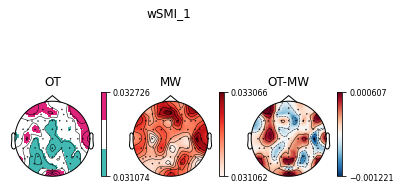

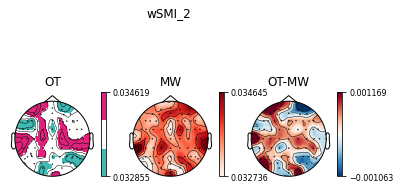

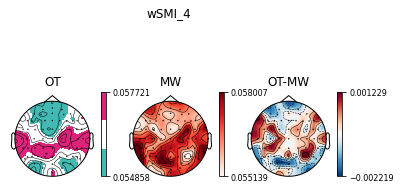

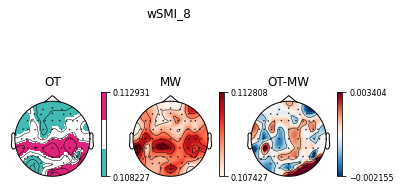

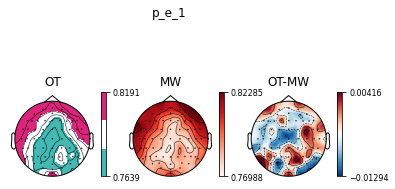

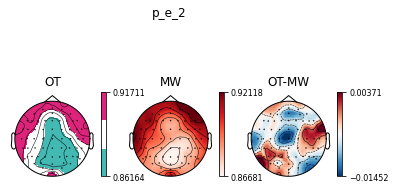

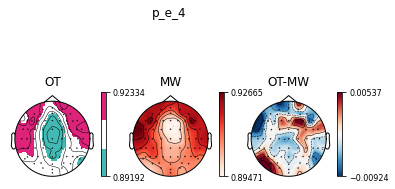

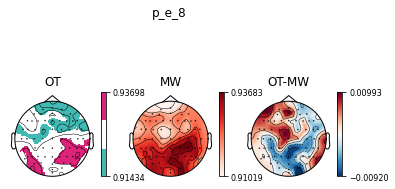

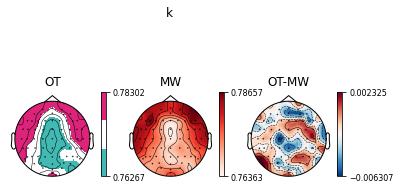

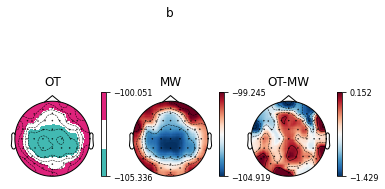

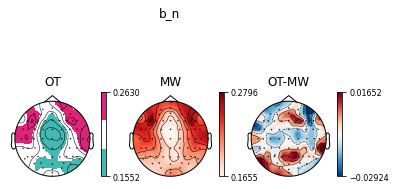

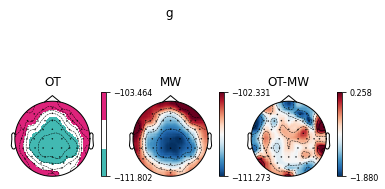

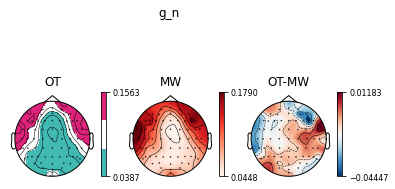

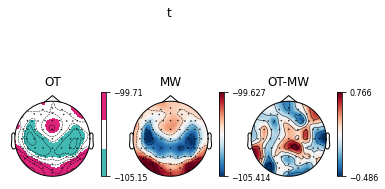

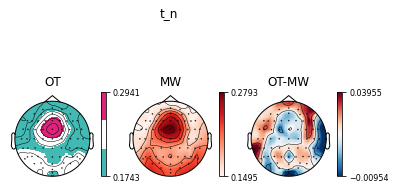

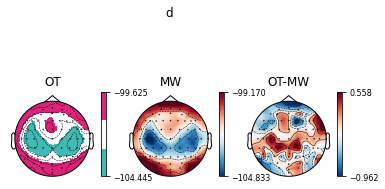

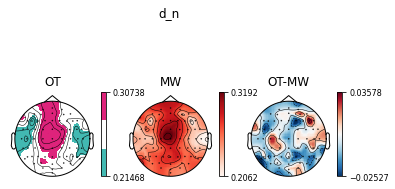

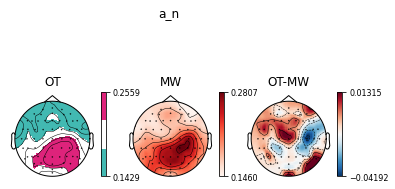

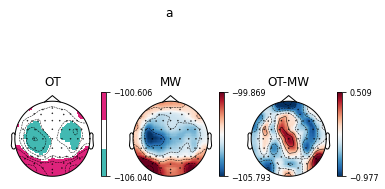

KeyboardInterrupt: 

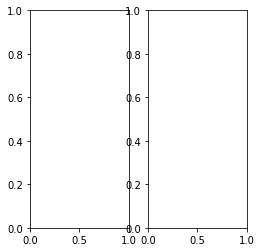

In [20]:
markers = ['wSMI_1', 'wSMI_2', 'wSMI_4', 'wSMI_8', 'p_e_1', 'p_e_2',
       'p_e_4', 'p_e_8', 'k', 'b', 'b_n', 'g', 'g_n', 't', 't_n',
       'd', 'd_n', 'a_n', 'a', 'CNV', 'P1', 'P3a', 'P3b']

epochs = epochs_subtracted

df_ot_agg = df_ot.groupby('electrode').mean()
df_mw_agg = df_mw.groupby('electrode').mean()

df_topo = df_mw_agg
df_topo = df_topo.append(df_ot_agg)

df_topo = df_topo.groupby('electrode').diff().dropna()

for marker in markers:
    
    fig, ax = plt.subplots(1,3)

    fig.suptitle(marker)

    im, _ = mne.viz.plot_topomap(df_ot_agg[marker].values, pos = epochs.info, 
                         image_interp='nearest', outlines='head', sensors=True,
                         vmin = np.nanmin(df_ot_agg[marker].values), vmax = np.nanmax(df_ot_agg[marker].values), axes = ax[0], cmap =cmap,show = False)
    ax[0].set_title('OT')
    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax, ticks=(np.nanmin(df_ot_agg[marker].values), np.nanmax(df_ot_agg[marker].values)))
    cbar.ax.tick_params(labelsize=8)

    im, _ = mne.viz.plot_topomap(df_mw_agg[marker].values, pos = epochs.info, 
                         image_interp='nearest', outlines='head', sensors=True,
                         vmin = np.nanmin(df_mw_agg[marker].values), vmax = np.nanmax(df_mw_agg[marker].values), axes = ax[1], show = False)
    ax[1].set_title('MW')
    divider = make_axes_locatable(ax[1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax, ticks=(np.nanmin(df_mw_agg[marker].values), np.nanmax(df_mw_agg[marker].values)))
    cbar.ax.tick_params(labelsize=8)

    im, _ = mne.viz.plot_topomap(df_topo[marker].values, pos = epochs.info, 
                         image_interp='nearest', outlines='head', sensors=True,
                         vmin = np.nanmin(df_topo[marker].values), vmax = np.nanmax(df_topo[marker].values), axes = ax[2], show= False)
    ax[2].set_title('OT-MW')
    divider = make_axes_locatable(ax[2])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax, ticks=(np.nanmin(df_topo[marker].values), np.nanmax(df_topo[marker].values)))
    cbar.ax.tick_params(labelsize=8)


    plt.show()
    

# Plot deliberate MW vs spontaneous Mind-Wandering topographies

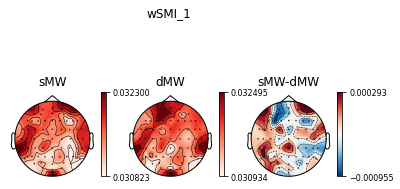

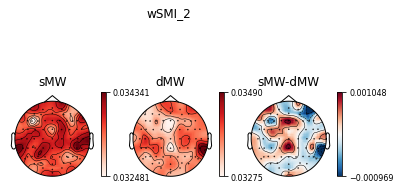

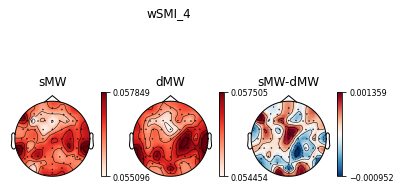

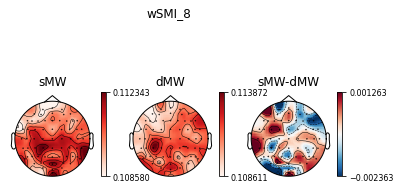

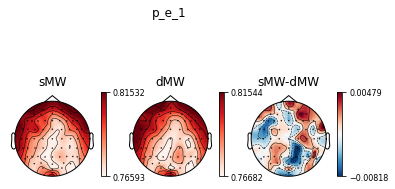

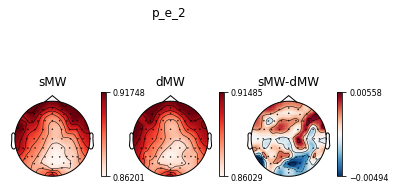

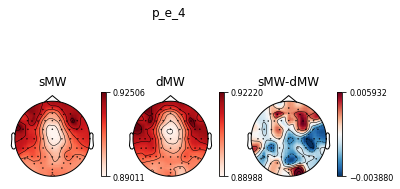

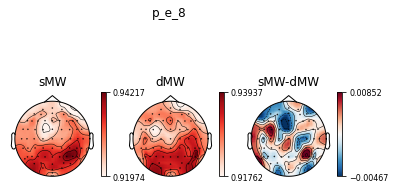

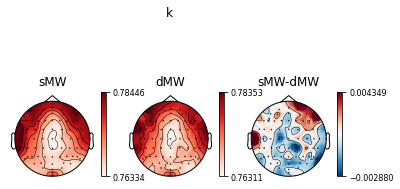

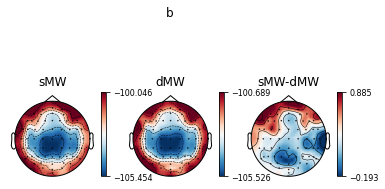

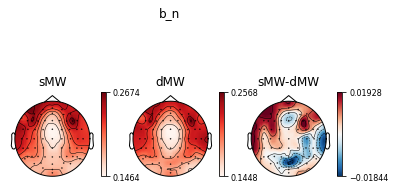

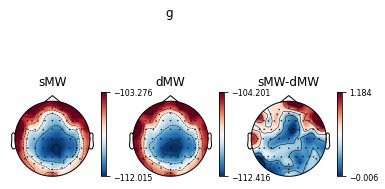

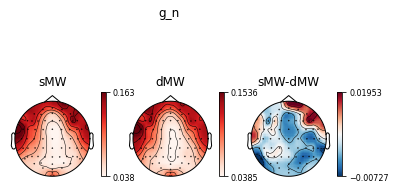

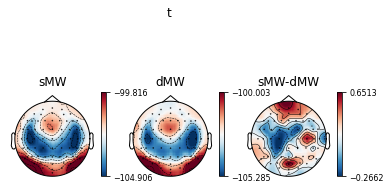

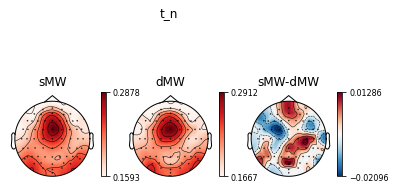

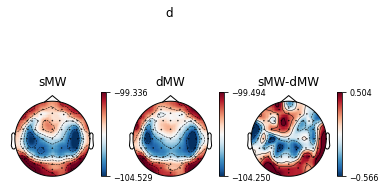

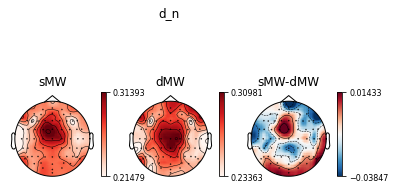

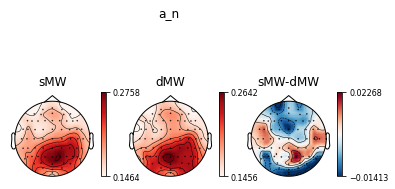

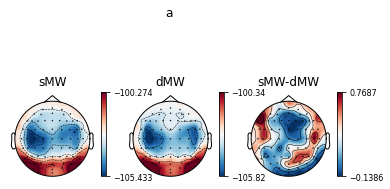

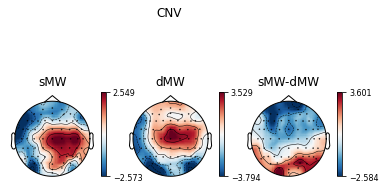

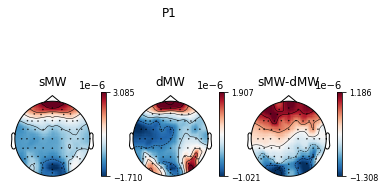

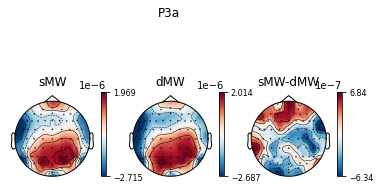

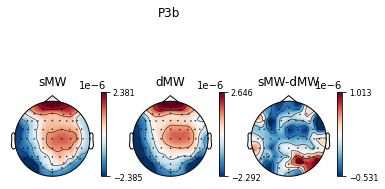

In [10]:
df_smw_agg = df_smw.groupby('electrode').mean()
df_dmw_agg = df_dmw.groupby('electrode').mean()

df_topo = df_dmw_agg
df_topo = df_topo.append(df_smw_agg)

df_topo = df_topo.groupby('electrode').diff().dropna()

for marker in markers:
    
    fig, ax = plt.subplots(1,3)

    fig.suptitle(marker)

    im, _ = mne.viz.plot_topomap(df_smw_agg[marker].values, pos = epochs.info, 
                         image_interp='nearest', outlines='head', sensors=True,
                         vmin = np.nanmin(df_smw_agg[marker].values), vmax = np.nanmax(df_smw_agg[marker].values), axes = ax[0], show = False)
    ax[0].set_title('sMW')
    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax, ticks=(np.nanmin(df_smw_agg[marker].values), np.nanmax(df_smw_agg[marker].values)))
    cbar.ax.tick_params(labelsize=8)

    im, _ = mne.viz.plot_topomap(df_dmw_agg[marker].values, pos = epochs.info, 
                         image_interp='nearest', outlines='head', sensors=True,
                         vmin = np.nanmin(df_dmw_agg[marker].values), vmax = np.nanmax(df_dmw_agg[marker].values), axes = ax[1], show = False)
    ax[1].set_title('dMW')
    divider = make_axes_locatable(ax[1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax, ticks=(np.nanmin(df_dmw_agg[marker].values), np.nanmax(df_dmw_agg[marker].values)))
    cbar.ax.tick_params(labelsize=8)

    im, _ = mne.viz.plot_topomap(df_topo[marker].values, pos = epochs.info, 
                         image_interp='nearest', outlines='head', sensors=True,
                         vmin = np.nanmin(df_topo[marker].values), vmax = np.nanmax(df_topo[marker].values), axes = ax[2], show= False)
    ax[2].set_title('sMW-dMW')
    divider = make_axes_locatable(ax[2])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax, ticks=(np.nanmin(df_topo[marker].values), np.nanmax(df_topo[marker].values)))
    cbar.ax.tick_params(labelsize=8)


    plt.show()
    

In [11]:
from mne.stats import spatio_temporal_cluster_test
from mne.channels import find_ch_adjacency
from scipy.sparse import spmatrix

In [12]:
adjacency, ch_names = find_ch_adjacency(epochs_subtracted.info, 'eeg')
# adjacency = spmatrix(adjacency)

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 64


Text(0.5, 1.0, 'Between-sensor adjacency')

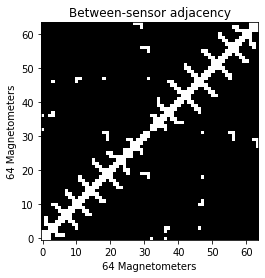

In [13]:
plt.imshow(adjacency.toarray(), cmap='gray', origin='lower',
           interpolation='nearest')
plt.xlabel('{} Magnetometers'.format(len(ch_names)))
plt.ylabel('{} Magnetometers'.format(len(ch_names)))
plt.title('Between-sensor adjacency')

In [14]:
cluster_p = []
for marker in markers:
    print(marker)
    ot = df_ot.pivot(index = 'participant',columns = 'electrode')[marker].values
    ot = ot.reshape( (len(ot),1,64) )
    mw = df_mw.pivot(index = 'participant',columns = 'electrode')[marker].values
    mw = mw.reshape( (len(mw),1,64) )
    
#     dmw = df_dmw.pivot(index = 'participant',columns = 'electrode')[marker].values
#     dmw = dmw.reshape( (len(dmw),1,64) )
#     smw = df_smw.pivot(index = 'participant',columns = 'electrode')[marker].values
#     smw = smw.reshape( (len(smw),1,64) )

    contrast = [dmw, smw]
    
    threshold = 2
    T_obs, clusters, cluster_p_values, H0 = \
    spatio_temporal_cluster_test(contrast, n_permutations=1000,
                             threshold=threshold, tail=1, n_jobs=1,
                             adjacency= adjacency,
                             out_type='mask')
    cluster_p.append(cluster_p_values)
    

wSMI_1


ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
cluster_p

ValueError: x and y must have same first dimension, but have shapes (201,) and (1, 64)

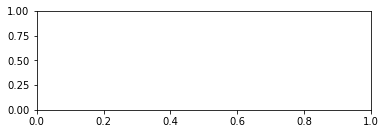

In [41]:
times = epochs_erp.times
plt.close('all')
plt.subplot(211)
# plt.title('Channel : ' + channel)
plt.plot(times, contrast[0].mean(axis=0) - contrast[1].mean(axis=0),
         label="ERF Contrast (Event 1 - Event 2)")
plt.ylabel("MEG (T / m)")
plt.legend()
plt.subplot(212)
for i_c, c in enumerate(clusters):
    c = c[0]
    if cluster_p_values[i_c] <= 0.05:
        h = plt.axvspan(times[c.start], times[c.stop - 1],
                        color='r', alpha=0.3)
    else:
        plt.axvspan(times[c.start], times[c.stop - 1], color=(0.3, 0.3, 0.3),
                    alpha=0.3)
hf = plt.plot(times, T_obs, 'g')
plt.legend((h, ), ('cluster p-value < 0.05', ))
plt.xlabel("time (ms)")
plt.ylabel("f-values")
plt.show()